Bien que le virus n'est pas suffisamment mortel pour provoquer le déclin de toute une population, nous allons ici nous imaginer le contraire et chercher à voir quels pays verrait sa population décliner plus vite faute à un taux de reproduction plus faible et un virus faisant plus de dommage. 

Le dataset utilisé provient du lien suivant : https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 
%matplotlib inline

In [24]:
df = pd.read_csv('datas/covid19.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


Nous gardons que les données à la date du 1er Avril 2021. 

In [25]:
df = df[df.date == '2021-04-01']
df.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
402,AFG,Asia,Afghanistan,2021-04-01,56517.0,63.0,41.571,2489.0,5.0,3.143,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
820,OWID_AFR,NaN,Africa,2021-04-01,4239457.0,22144.0,13054.857,113166.0,407.0,281.857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1226,ALB,Europe,Albania,2021-04-01,125506.0,349.0,391.286,2241.0,6.0,8.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795


On ne retient que les colonnes qui nous intéresse, ici au lieu de prendre le nombre de mort par pays on préfèrera le nombre de mort par million d'habitant étant donnée que certains rélèveront plus de décès que d'autres seulement car leurs population sont plus importantes. Heureusement pour nous cette donnée existe dans le jeu de donnée et nous n'avons pas besoin de le normaliser nous même.

On se débarasse ensuite des lignes qui possède des cases vides car elle ne pourront pas être traité.

In [26]:
df = df[['iso_code', 'continent', 'location', 'reproduction_rate', 'total_deaths_per_million']]
df = df.dropna()
df

,iso_code,continent,location,reproduction_rate,total_deaths_per_million
402,AFG,Asia,Afghanistan,1.50,63.938
1226,ALB,Europe,Albania,0.79,778.720
1632,DZA,Africa,Algeria,0.99,70.603
2032,AND,Europe,Andorra,1.17,1488.384
2414,AGO,Africa,Angola,1.17,16.369
...,...,...,...,...,...
77656,VEN,South America,Venezuela,1.35,56.794
78095,VNM,Asia,Vietnam,1.27,0.360
78896,YEM,Asia,Yemen,1.36,30.376
79280,ZMB,Africa,Zambia,0.75,65.927


In [27]:
df.isnull().sum().sum()

0

<module 'matplotlib.pyplot' from 'C:\\Users\\laith\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

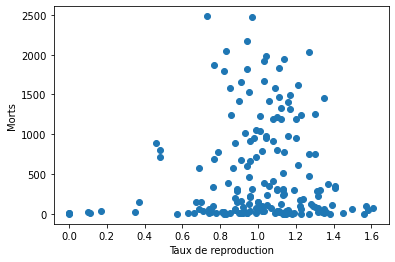

In [28]:
plt.scatter(df.reproduction_rate, df.total_deaths_per_million)
plt.xlabel('Taux de reproduction')
plt.ylabel('Morts')
plt

A vue d'oeil on peut voir 2-3 groupe, mais avant de commencer à clusteriser on remarque le besoin d'uniformiser les axes.

In [29]:
scaler = MinMaxScaler()

df['reproduction_rate'] = scaler.fit_transform(df['reproduction_rate'].values.reshape(-1, 1))
df['total_deaths_per_million'] = scaler.fit_transform(df['total_deaths_per_million'].values.reshape(-1, 1))

df.head(2)

,iso_code,continent,location,reproduction_rate,total_deaths_per_million
402,AFG,Asia,Afghanistan,0.931677,0.025616
1226,ALB,Europe,Albania,0.490683,0.313575


A l'aide du 'Sum of Squared Errors' nous allons essayer de trouver la valeur du coude qui sera alors notre nombre de cluster. 

In [30]:
k_range = range(1, 10)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['reproduction_rate', 'total_deaths_per_million']])
    sse.append(km.inertia_)

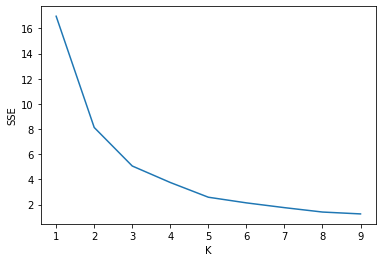

In [31]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range, sse)

On prend 3 comme nombre de cluster et on les ajoutes dans une nouvelle colonne de notre dataframe représenté par des couleurs.

In [32]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['reproduction_rate', 'total_deaths_per_million']])
df['cluster'] = y_predicted

In [33]:
def cluster_color(c):
    if c == 0:
        return 'blue'
    elif c == 1:
        return 'red'
    else:
        return 'green'

df['cluster'] = df.cluster.map(cluster_color)
df.head()

,iso_code,continent,location,reproduction_rate,total_deaths_per_million,cluster
402,AFG,Asia,Afghanistan,0.931677,0.025616,blue
1226,ALB,Europe,Albania,0.490683,0.313575,green
1632,DZA,Africa,Algeria,0.614907,0.028301,blue
2032,AND,Europe,Andorra,0.726708,0.599472,red
2414,AGO,Africa,Angola,0.726708,0.006453,blue


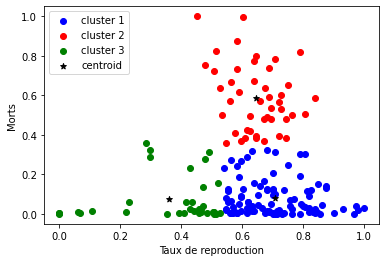

In [34]:
cluster0 = df[df.cluster == 'blue']
cluster1 = df[df.cluster == 'red']
cluster2 = df[df.cluster == 'green']

plt.scatter(cluster0.reproduction_rate, cluster0.total_deaths_per_million, color='blue', label='cluster 1')
plt.scatter(cluster1.reproduction_rate, cluster1.total_deaths_per_million, color='red', label='cluster 2')
plt.scatter(cluster2.reproduction_rate, cluster2.total_deaths_per_million, color='green', label='cluster 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='centroid')

plt.xlabel('Taux de reproduction')
plt.ylabel('Morts')

plt.legend()

Les 3 clusters semble plutôt bien réparti.
* Le cluster d'en bas à droite représente les pays ayant un fort taux de reproduction et un plus faible taux de mort, ils ne sont donc à priori pas en danger de déclin si on part du principe que le virus est bien plus fatale pour tous.
* De même, un autre cluster connait un fort taux de reproduction mais il en est de même pour le taux de morts, un "équilibre" est donc trouvé.
* Enfin, un cluster connait peu de reproduction mais aussi peu de mort, on se retrouve alors dans une situation à peu près similaire au cluster précédent.

*Les couleurs et numéros changeant tous le temps il n'est pas fiable de se reposer sur eux pour les descriptions.*

On remarque qu'alors aucun cluster n'est représentatif d'une population faisant fâce à un danger de déclin dans le cas où le virus aurait été très très très mortel comme dans les films. En effet, ce cluster viendrait se placer en haut à gauche du graphique.

Par curiosité nous allons voir quels pays sont concernés par quelle situation et essayer de comprendre **pourquoi les pays avec un faible taux de reproduction ont tous moins de mort sans exception ?**

Grâce à ce second set de donnée https://gist.github.com/tadast/8827699 nous allons associer à chaque pays (via son code à 3 lettre) sa latitude et longitude.

In [35]:
df_geo = pd.read_csv('datas/countries_codes_and_coordinates.csv')
df_geo = df_geo[['Alpha-3 code', 'Latitude', 'Longitude']]
df_geo.head(3)

,Alpha-3 code,Latitude,Longitude
0,"""AFG""","""33""","""65"""
1,"""ALB""","""41""","""20"""
2,"""DZA""","""28""","""3"""


In [36]:
df_geo = df_geo.applymap(lambda x: x.replace(' "', '') if (isinstance(x, str)) else x)
df_geo = df_geo.applymap(lambda x: x.replace('"', '') if (isinstance(x, str)) else x)

In [37]:
df_geo.Latitude[0]

'33'

In [38]:
df_geo.Latitude = df_geo.Latitude.map(lambda x: float(x))
df_geo.Longitude = df_geo.Longitude.map(lambda x: float(x))
df_geo.Latitude[0]

33.0

Certains pays sont présent plusieurs fois, on en laisse qu'un. 

In [39]:
df_geo.loc[df_geo['Alpha-3 code'] == 'VNM']

,Alpha-3 code,Latitude,Longitude
247,VNM,16.0,106.0
248,VNM,16.0,106.0


In [40]:
df_geo.drop_duplicates('Alpha-3 code', keep='last', inplace=True)
df_geo

,Alpha-3 code,Latitude,Longitude
0,AFG,33.0000,65.0
1,ALB,41.0000,20.0
2,DZA,28.0000,3.0
3,ASM,-14.3333,-170.0
4,AND,42.5000,1.6
...,...,...,...
251,WLF,-13.3000,-176.2
252,ESH,24.5000,-13.0
253,YEM,15.0000,48.0
254,ZMB,-15.0000,30.0


In [41]:
df_geo.loc[df_geo['Alpha-3 code'] == 'VNM']

,Alpha-3 code,Latitude,Longitude
248,VNM,16.0,106.0


On renomme le nom de la colonne 'Alpha-3 code' en 'iso_code' pour concorder avec le premier dataframe et pouvoir merger les deux plus facilement.

In [42]:
df_geo.rename(columns = {'Alpha-3 code':'iso_code'}, inplace = True)
df_geo.head(0)

,iso_code,Latitude,Longitude


In [43]:
df_all = df.merge(df_geo)
df_all.head()

,iso_code,continent,location,reproduction_rate,total_deaths_per_million,cluster,Latitude,Longitude
0,AFG,Asia,Afghanistan,0.931677,0.025616,blue,33.0,65.0
1,ALB,Europe,Albania,0.490683,0.313575,green,41.0,20.0
2,DZA,Africa,Algeria,0.614907,0.028301,blue,28.0,3.0
3,AND,Europe,Andorra,0.726708,0.599472,red,42.5,1.6
4,AGO,Africa,Angola,0.726708,0.006453,blue,-12.5,18.5


Il est maintenant temps d'afficher ces clusters sur une carte.

In [44]:
from folium import (plugins, FeatureGroup, Map, Circle, Marker, LayerControl, Popup, CircleMarker, Vega)
world = Map(tiles='cartodbpositron')
from IPython.display import IFrame
opa = [0.99,0.99,0.5]
for i in df_all.index:
    CircleMarker([df_all.loc[i].Latitude, df_all.loc[i].Longitude], width=450, height=250, color=df_all.loc[i].cluster, radius=5, fill=True).add_to(world)

world

On observe que les pays avec un faible taux de reproduction (et donc semblerait-il moins de mort) sont globalement des pays pauvres ou pas très fréquenté. Leur taux de reproduction n'est bien sûr pas ce qui explique ce phénomène, mais peut-être que du à leurs précarités leurs système imunitaire a développés des résistances surtout que l'on remarque que les pays avec un plus haut taux de mort sont majoritairement des pays développés ou en voie de développement.

Bien entendu, plusieurs conclusion peuvent être tirés et se baser sur aussi peu de facteurs n'est pas assez pertinent pour prétendre avoir trouvé une vérité absolue.